In [3]:
import sys
sys.path.append("../Scripts")

In [4]:
import os, numpy as np, pandas as pd
import text_preprocessing as preprocessing
import feature_extraction as feature_extraction
import baseline_model as baseline
import plots as plt
import robust_classic_model as robust_model

  Using cached https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.5.0/es_core_news_sm-3.5.0-py3-none-any.whl (12.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 37.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to /Users/mash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
ERROR: Could not find a version that satisfies the requirement spacy-3.5.2 (from versions: none)
ERROR: No matching distribution found for spacy-3.5.2


[nltk_data] Downloading package stopwords to /Users/mash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.5.0/en_core_web_sm-3.5.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 34.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [5]:
# Vectorizadores
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [6]:
path = '../Author profiling/PAN20-Fake-News/Datasets/CSV/'
training = pd.read_csv(f'{path}Train-ES.csv')
test = pd.read_csv(f'{path}Test-ES.csv')
data = [training, test]

In [7]:
# Creating text preprocessing object
prep = preprocessing.Preprocessing(language='spanish')

In [8]:
# Loop for cleaning text data
data_preprocessed = []
for d in data:
    data_prep = prep.main_preprocess(data=d, 
                                    column='tweet', 
                                    tweet=True, 
                                    tweet_tags=True, 
                                    remove_stop_words=False,
                                    lemmatize=False,
                                    translate_emojis=False,
                                    whitelist = "")
    data_preprocessed.append(data_prep)

In [9]:
# Vectorizers
vectorizer = CountVectorizer(ngram_range = (1,1), 
                            lowercase = False)
oth_feats_vectorizer = CountVectorizer(ngram_range = (1,1), 
                                        lowercase = False)

In [12]:
# Language dict
language_dict = {'spanish': 'es', 'english': 'en'}
language_dict['spanish']

'es'

In [10]:
language = {'spanish': 'es', 'english': 'en'}
print(language['spanish'])

es


In [11]:
for i, d in enumerate(data_preprocessed):
    features = feature_extraction.FeatureExtraction(data=d,
                                                    text_column='tweet', 
                                                    lemma=True, 
                                                    pos=True, 
                                                    tag=True,                                
                                                    other_features=True,
                                                    vectorizer=vectorizer,
                                                    oth_feats_vectorizer=oth_feats_vectorizer,
                                                    language='es')
    
    # Getting training features
    if i == 0:
        training_dataframe = features.add_features()
    
    # Getting training features
    else:
        test_dataframe = features.add_features()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Logistic Regression (label-(1, 1)-3) --> Accuracy: 0.66


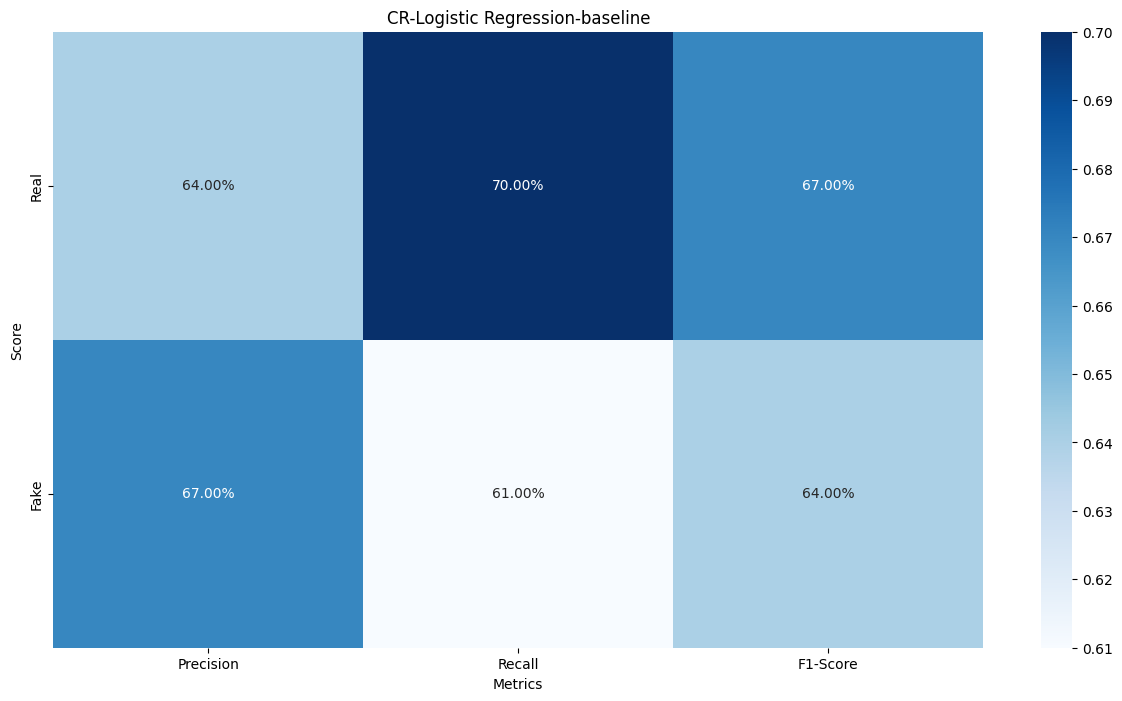

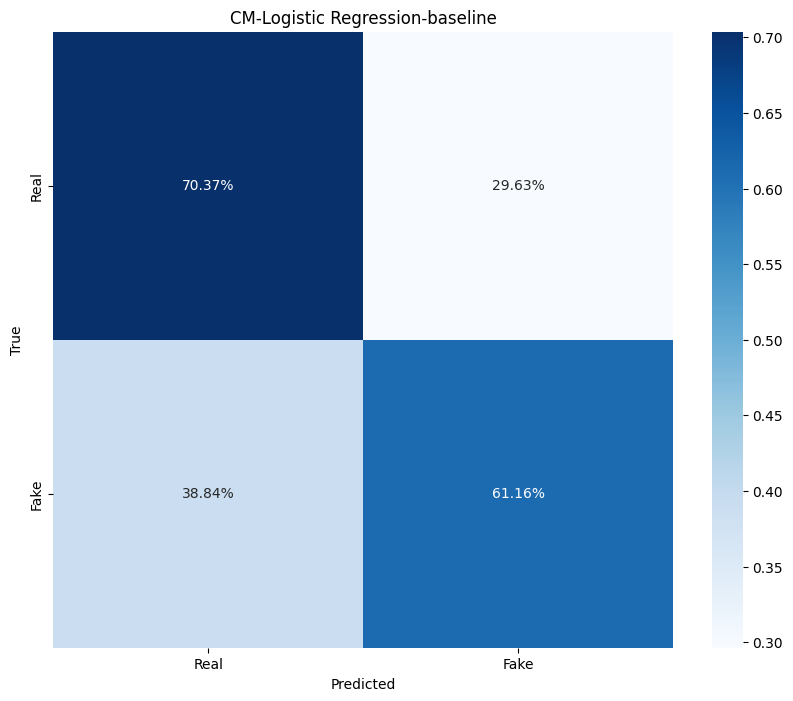

Model Random Forest (label-(1, 1)-3) --> Accuracy: 0.63


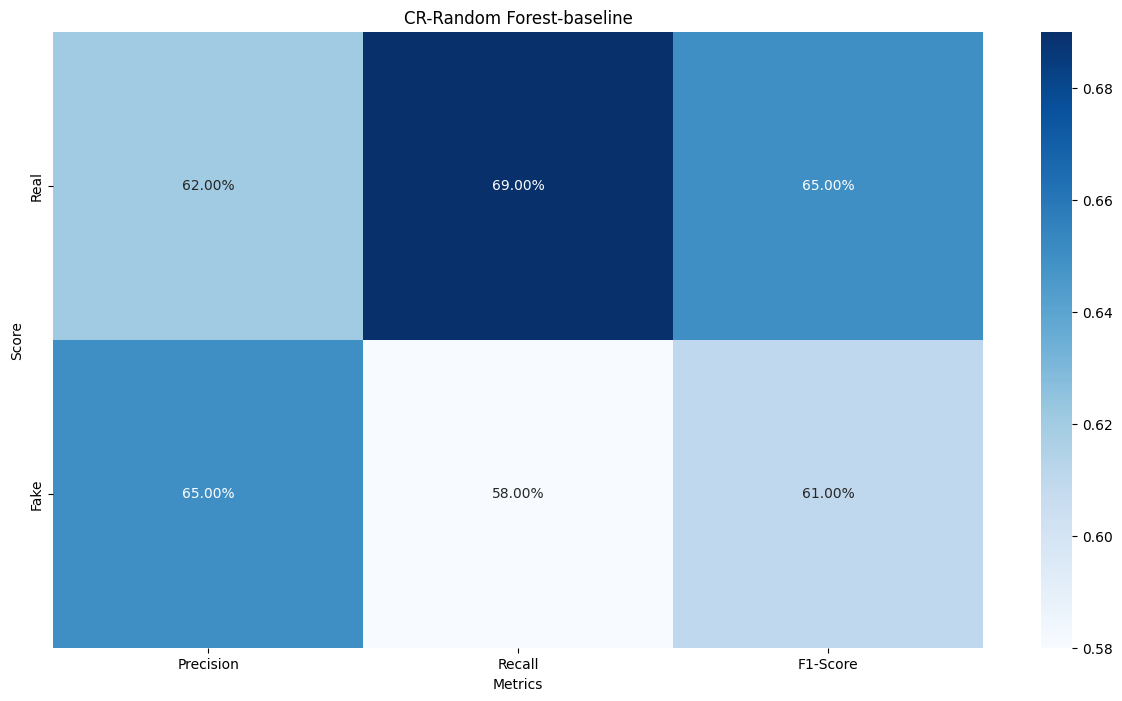

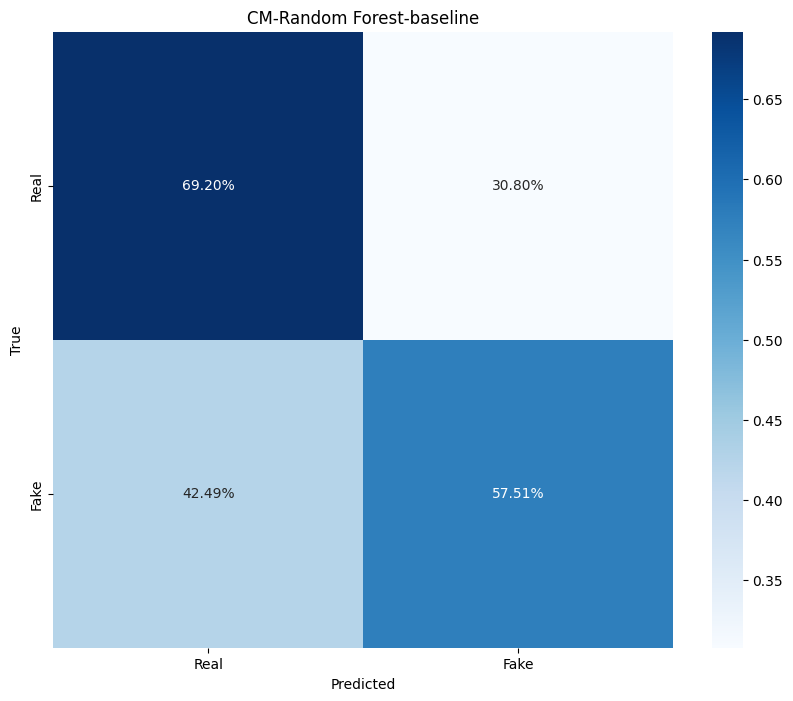

Model Linear SVC (label-(1, 1)-3) --> Accuracy: 0.64


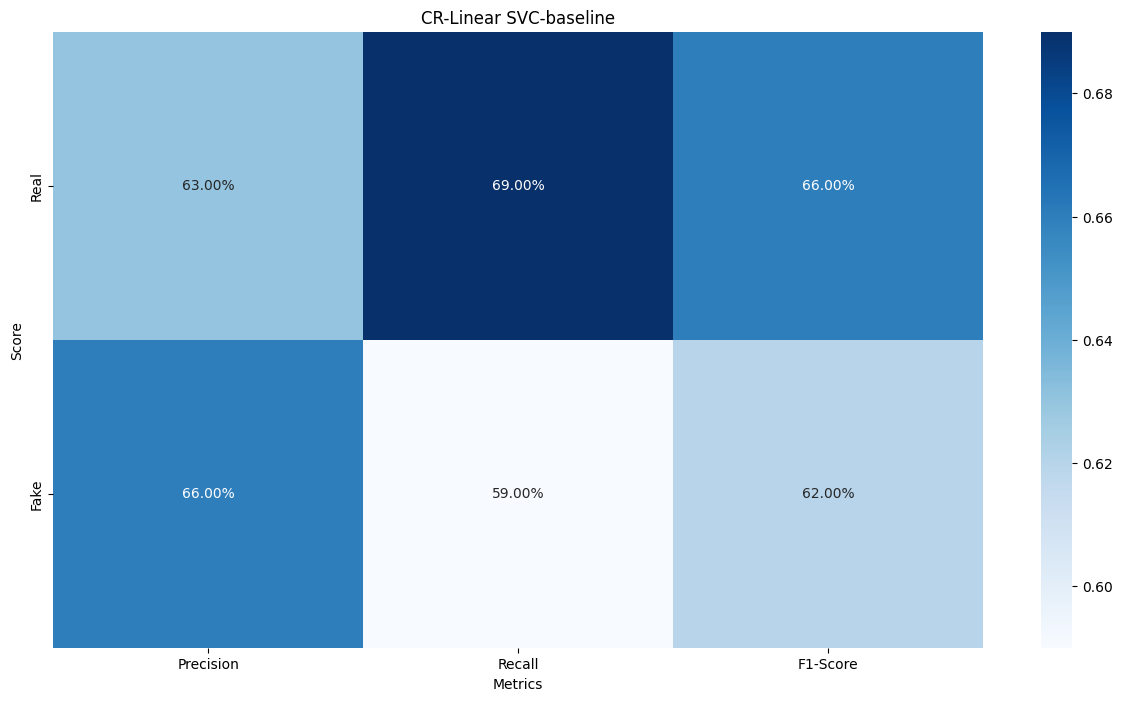

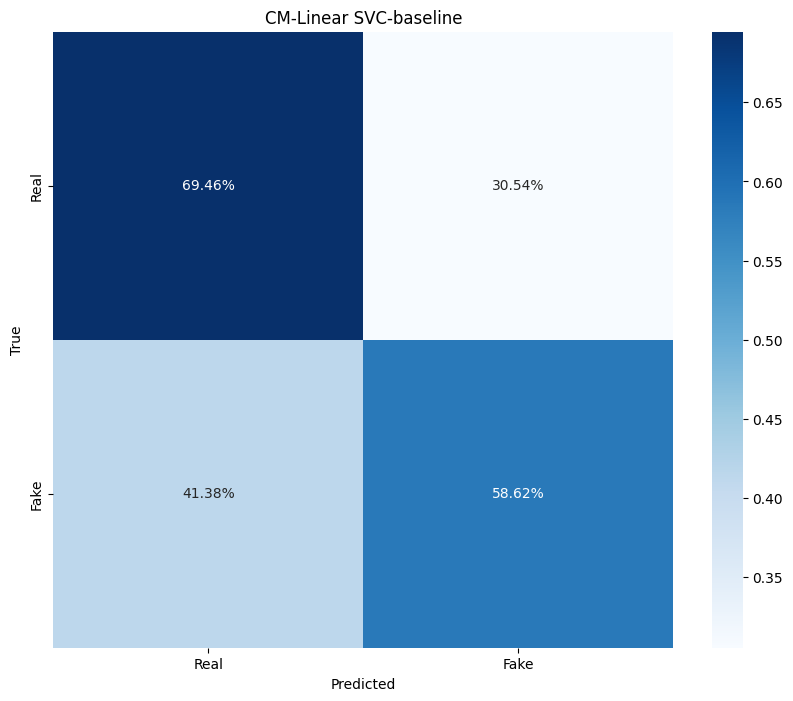

Model Multinomial NB (label-(1, 1)-3) --> Accuracy: 0.64


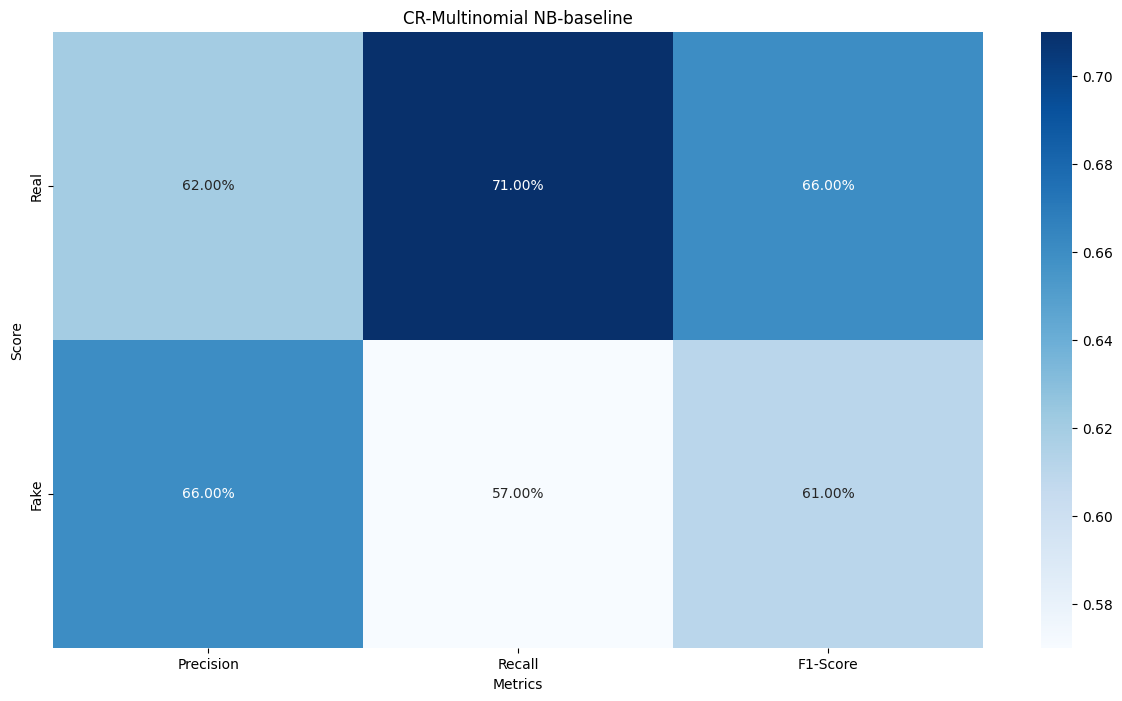

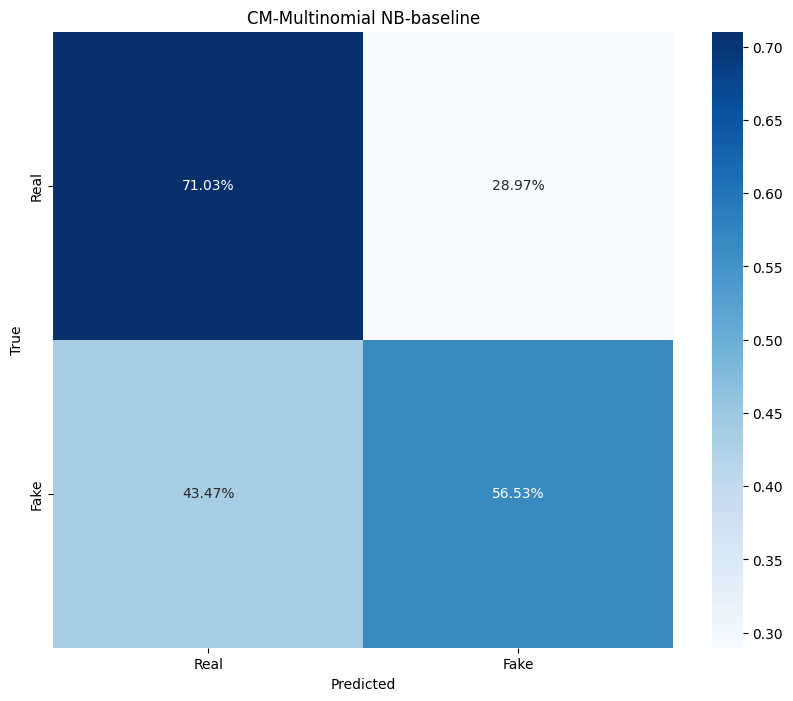

Model MLP (label-(1, 1)-3) --> Accuracy: 0.62


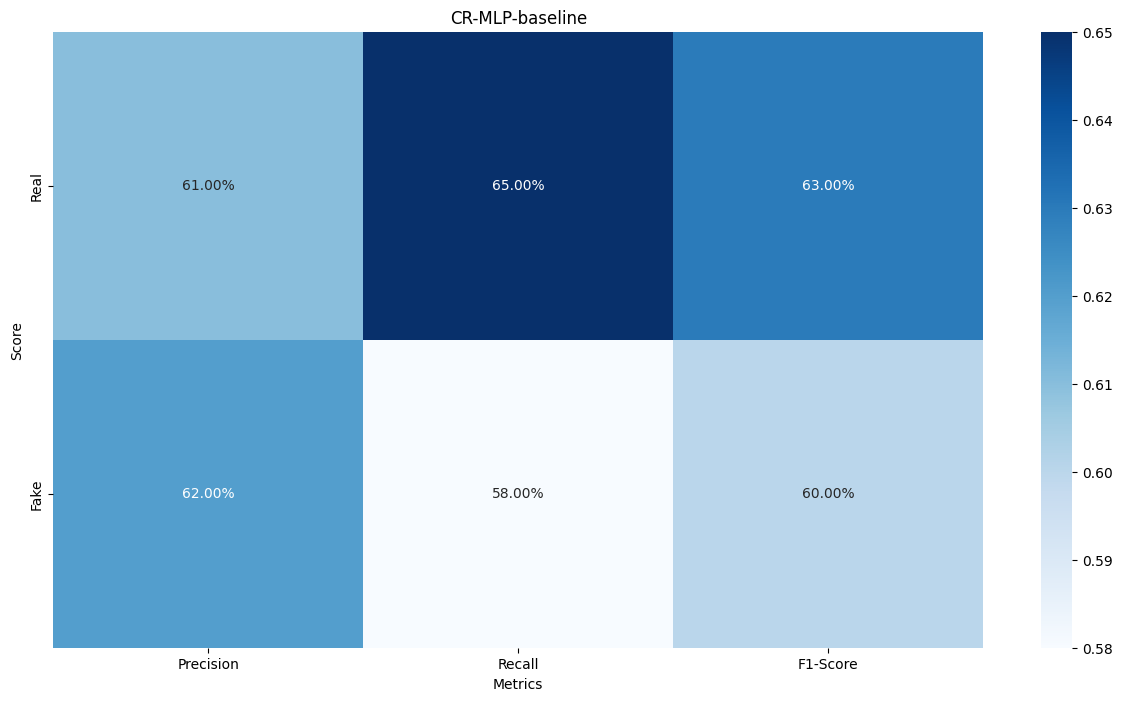

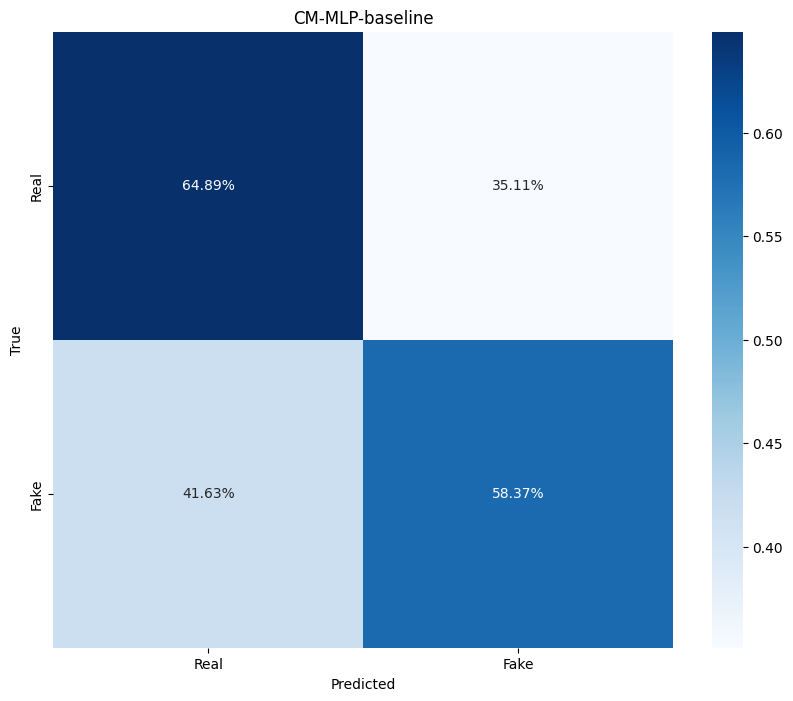

Model Perceptron (label-(1, 1)-3) --> Accuracy: 0.61


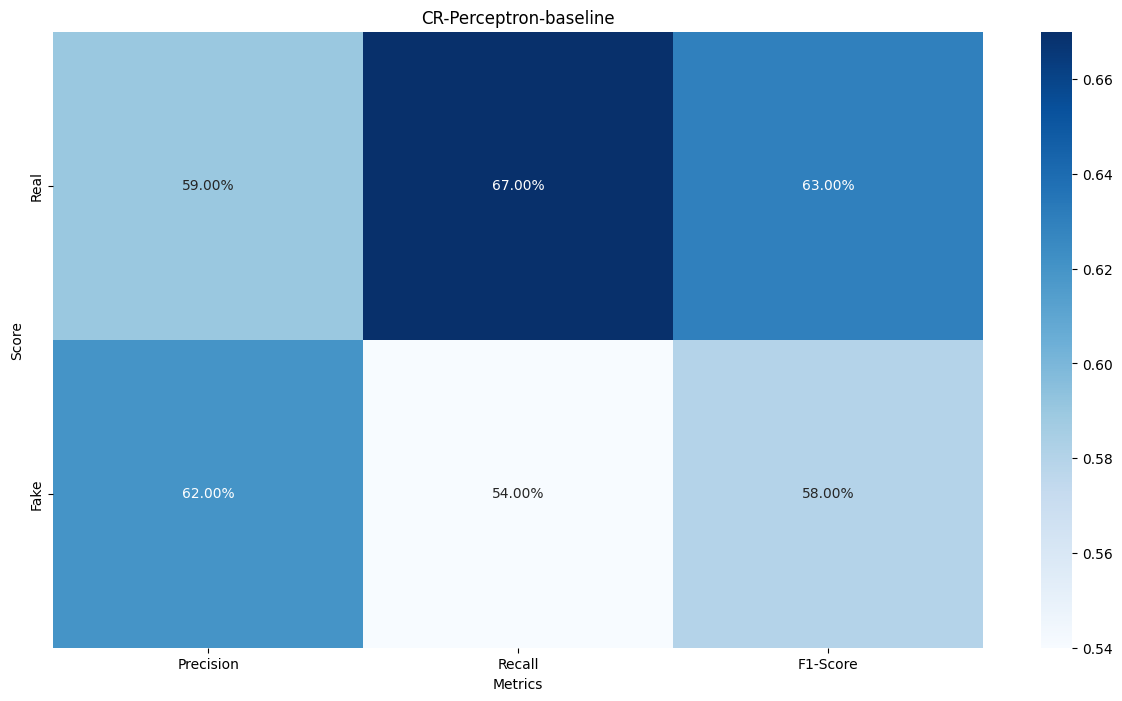

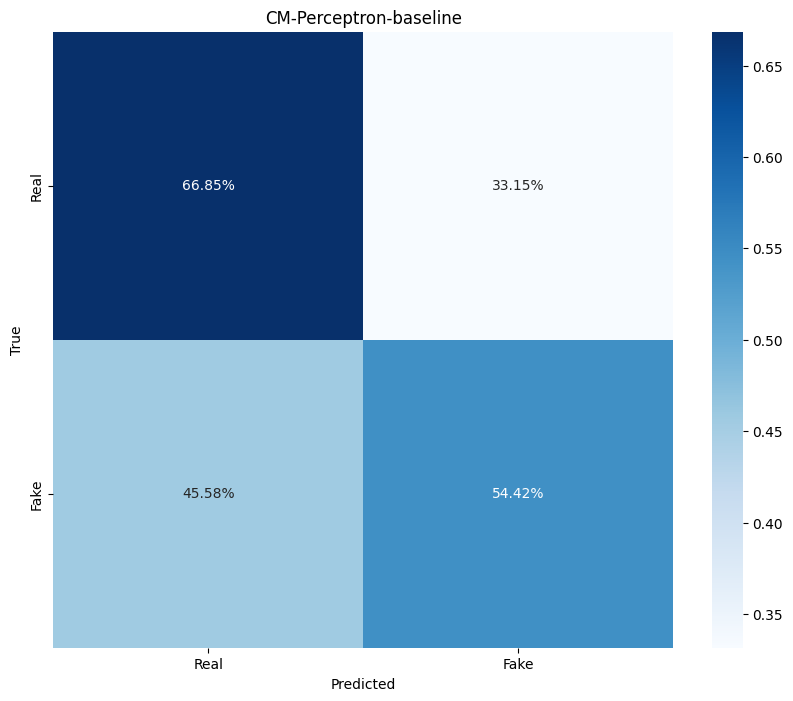

Model KNN (label-(1, 1)-3) --> Accuracy: 0.59


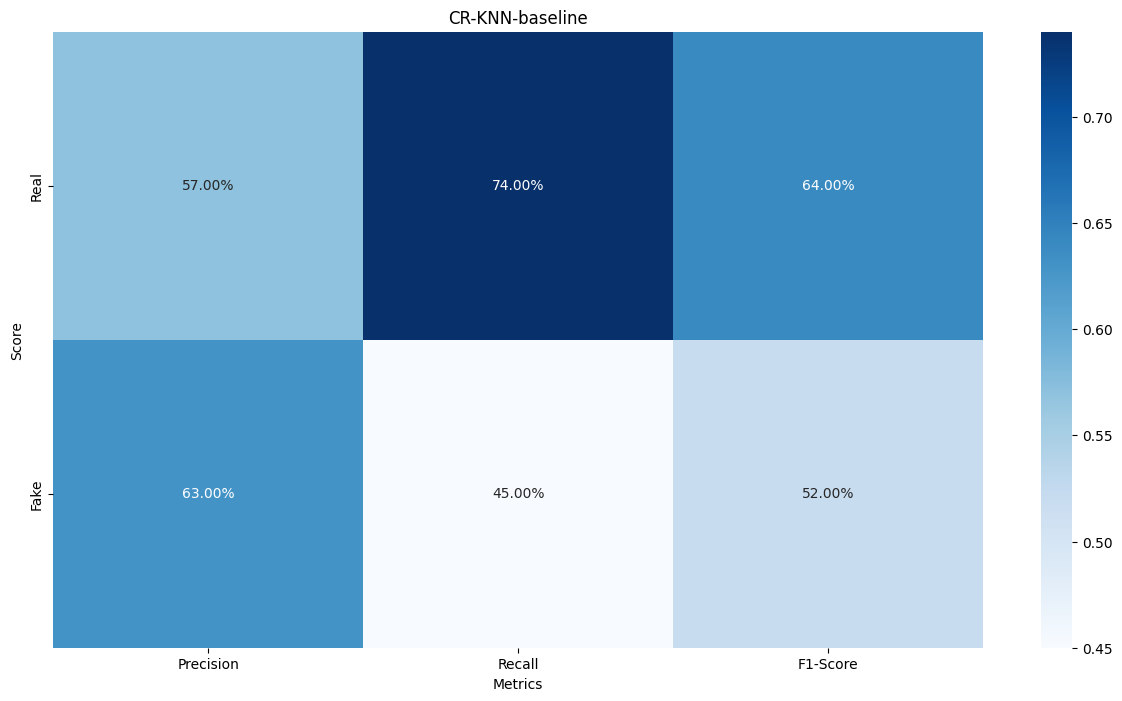

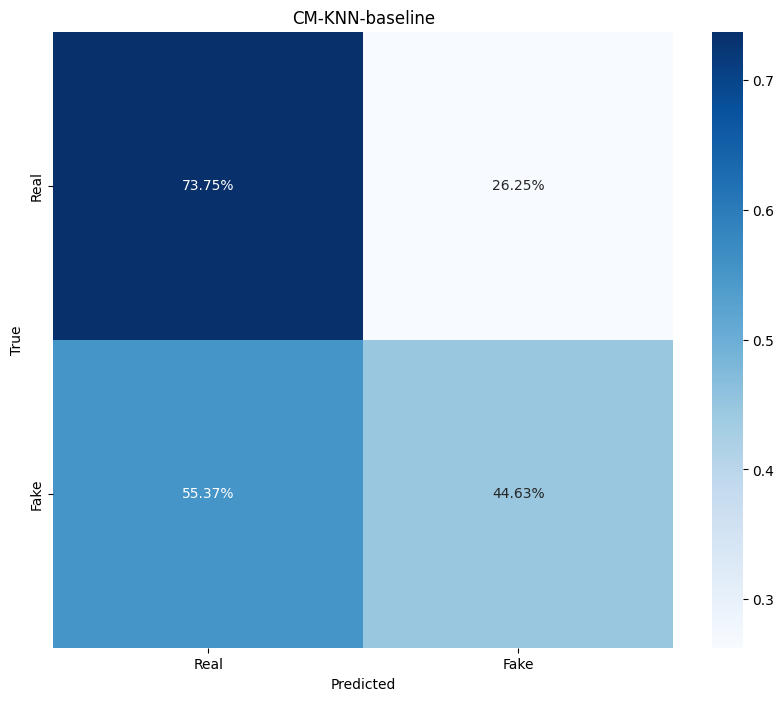

In [ ]:
# Algoritmos de ML
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
models = [LogisticRegression(), 
          RandomForestClassifier(), 
          CalibratedClassifierCV(LinearSVC()), 
          MultinomialNB(), 
          MLPClassifier(), 
          CalibratedClassifierCV(Perceptron()), 
          KNeighborsClassifier()]
model_names = ['Logistic Regression', 
               'Random Forest', 
               'Linear SVC', 
               'Multinomial NB', 
               'MLP', 
               'Perceptron', 
               'KNN']

for i, model in enumerate(models):
    base = baseline.Baseline(model=model,
                            train_data=training_dataframe, 
                            test_data=test_dataframe, 
                            x_label_column='tweet', 
                            y_label_column='label', 
                            ngram_range=(1,1), 
                            min_df=3, 
                            model_name=model_names[i], 
                            target_names=['Real', 'Fake'])
    
    final_model, vectorizer, metrics = base.baseline()

    plots = plt.Plots(metrics=metrics)
    plots.plot_classification_report(title=f'CR-{model_names[i]}-baseline',
                                    x_label='Metrics',
                                    y_label='Score',
                                    x_labels=['Precision', 'Recall', 'F1-Score'],
                                    y_labels=['Real', 'Fake'])
    plots.plot_confusion_matrix(title=f'CM-{model_names[i]}-baseline',
                                x_label='Predicted',
                                y_label='True',
                                labels=['Real', 'Fake'])

## TODO: Fix this shit

In [ ]:
len(training_vector[10]), len(set(training_vocabulary))

(32691, 32676)

In [ ]:
a = training_vocabulary
seen = set()
uniq, index = [], []

for i, x in enumerate(a):
    if x not in seen:
        uniq.append(x)
        seen.add(x)
    else:
        index.append(i)

print(seen)
print(uniq)
print(index)

{'cepeda', 'lastimar', 'pipero', 'aureol', 'bonico', 'psc', 'manos', 'vietnam', 'invitación', 'bochornoso', 'dropbox', 'guindilla', 'comenta', 'comin', 'tamen', 'yucatecos', 'aprendera', 'jedi', 'risa', 'arratra', 'bolita', 'mero', 'desfile', 'rica', 'cernudar', 'tarjeta', 'compositor', 'balaguer', 'fracking', 'miniserie', 'floyd', 'andalu', 'preguntar', 'defined', 'conoci', 'estemos', 'abrazame', 'frito', 'qurar', 'funciono', 'burgues', 'prevalencia', 'bienhechora', 'batista', 'occidental', 'portero', 'podio', 'ascenso', 'amv', 'blesa', 'comeria', 'purificarte', 'memorandum', 'titol', 'inalcanzable', 'eliezer', 'tuto', 'migo', 'acertar', 'terminal', 'encontrarte', 'cu', 'justicia', 'blasio', 'climax', 'vago', 'manguir', 'biahe', 'doquier', 'urbín', 'desempa', 'yeni', 'indeseado', 'degradado', 'contrabanda', 'reflexologia', 'ubicario', 'entr', 'obtenia', 'picchu', 'moulin', 'mallorco', 'ardoz', 'pd', 'roaming', 'acallar', 'paulahincapie', 'bicentenario', 'administracion', 'jaume', 'con

In [ ]:
index.sort(reverse=True)


In [ ]:
copied_vector = training_vector.copy()
copied_vector = copied_vector.tolist()

In [ ]:
len(copied_vector[0])

32691

In [ ]:
new_training_vector = []
for vector in copied_vector:
    for idx in index:
        vector.pop(idx)
    new_training_vector.append(vector)

print(len(new_training_vector))

30000


In [ ]:
len(new_training_vector[10]), len(set(training_vocabulary))

(32676, 32676)

In [ ]:
X_train = new_training_vector
y_train = training['label'].tolist()
test_vectorizer = CountVectorizer(vocabulary=set(training_vocabulary), lowercase=False)
X_test = test_vectorizer.transform(test_dataframe['tweet'].tolist())
y_test = test_dataframe['label'].tolist()

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0, max_iter=1000, penalty='l2', random_state=42)

In [ ]:
from sklearn import metrics
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

KeyboardInterrupt: 